# ניתוח גורמים המשפיעים על חומרת תאונות דרכים


## 0. הגדרת שאלות המחקר המרכזיות


במחקר זה נבחן את הגורמים העיקריים המשפיעים על חומרת הפציעה בתאונות דרכים. שאלת המחקר המרכזית היא: מהם הגורמים המשמעותיים הקשורים לחומרת התאונה? בפרט, נבדוק מגוון גורמים אפשריים כגון תנאי תאורה, תנאי מזג אוויר, התנהגות ופעולות הנהג, סוג הדרך והמיקום הגיאוגרפי של התאונה. כדי לפרט, שאלות המשנה כוללות בין היתר:
האם תנאי התאורה (אור יום מול חושך, תאורת רחוב וכו') משפיעים על חומרת הפציעה בתאונה?
כיצד תנאי מזג האוויר (לדוגמה: בהיר, גשם, ערפל) קשורים לחומרת התאונה?
האם התנהגות הנהג (כגון נהיגה תחת השפעת אלכוהול/סמים או הסחת דעת) מגדילה את הסיכון לפציעה חמורה?
האם יש הבדלים גאוגרפיים בחומרת התאונות (למשל בין אזורים עירוניים לכבישים מהירים בין-עירוניים)?
אילו גורמים נוספים (מהירות מותרת, סוג הרכב, גיל הרכב, תקינות הרכב, תמרורים/רמזורים, ועוד) עשויים להשפיע על רמת החומרה של התאונה?
המטרה היא לענות על שאלות אלו באמצעות ניתוח נתוני תאונות (הנתונים בקובץ crash_data.csv), תוך יישום השיטות שנלמדו בקורס "סטטיסטיקה למדע הנתונים". המחקר יתבצע בשלבים סדורים, החל בהיכרות עם הנתונים, דרך ניתוחים תאוריים וסטטיסטיים, פיתוח מודלים שונים, ועד לסיכום המלצות מבוססות ממצאים.

## 1. טעינת הנתונים ותיאור ראשוני


In [21]:
# טעינת הנתונים לקובץ pandas DataFrame
import pandas as pd
df = pd.read_csv('crash_data.csv', encoding='ISO-8859-8')  # שימוש בקידוד מתאים אם נדרש
# הצגה של 5 הרשומות הראשונות לבדיקת המבנה
print(df.head(5))
# בדיקה בסיסית של גודל ומבנה הנתונים
print("Rows:", len(df), "Columns:", len(df.columns))
print(df.columns)


  Report Number Local Case Number                Agency Name  \
0   MCP3170003V         240000438   Montgomery County Police   
1   MCP3254003K         230072050   Montgomery County Police   
2    EJ7887003Q         230074270  Gaithersburg Police Depar   
3   MCP2674004J         230064598   Montgomery County Police   
4   MCP25280008         230067019   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash        01/03/2024 14:55               NaN   
1           Injury Crash  12/16/2023 12:36:00 PM  Maryland (State)   
2           Injury Crash  12/29/2023 12:00:00 PM  Maryland (State)   
3  Property Damage Crash        11/05/2023 21:07  Maryland (State)   
4  Property Damage Crash  11/18/2023 12:40:00 AM  Maryland (State)   

          Road Name Cross-Street Type Cross-Street Name  \
0               NaN               NaN               NaN   
1     GERMANTOWN RD            County    MIDDLEBROOK RD   
2  GREAT SENECA H

/var/folders/zt/dq2kcvnj1j3d39_l9mcfqtt40000gn/T/ipykernel_86902/507432998.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crash_data.csv', encoding='ISO-8859-8')  # שימוש בקידוד מתאים אם נדרש


| משתנה (English)                    | תיאור (עברית)                                              | סוג הערכים (Type)                             |
| ---------------------------------- | ---------------------------------------------------------- | --------------------------------------------- |
| **Report Number**                  | מספר מזהה ייחודי לדיווח תאונה (מספר דו"ח תאונה)            | מזהה קטגורי (מחרוזת)                          |
| **Local Case Number**              | מספר מקרה פנימי של הרשויות (משטרה)                         | מזהה קטגורי (מחרוזת)                          |
| **Agency Name**                    | שם הגוף המדווח (למשל משטרת התנועה או מחוז)                 | קטגורי (מחרוזת)                               |
| **ACRS Report Type**               | סוג הדו"ח במערכת ACRS (ייתכן "Crash" מלא או דיווח מקוצר)   | קטגורי                                        |
| **Crash Date/Time**                | תאריך ושעת התאונה                                          | תאריך ושעה (מחרוזת, נמיר לדאטה-טיים)          |
| **Route Type**                     | סוג הדרך (כביש בינעירוני, כביש מקומי, כביש מדינה וכו')     | קטגורי (ערכים כמו "Interstate", "County")     |
| **Road Name**                      | שם הכביש הראשי בו אירעה התאונה                             | קטגורי (מחרוזת)                               |
| **Cross-Street Type**              | סוג הכביש החוצה (אם רלוונטי, למשל צומת)                    | קטגורי                                        |
| **Cross-Street Name**              | שם הרחוב החוצה (במקרה של צומת)                             | קטגורי (מחרוזת)                               |
| **Off-Road Description**           | תיאור מיקום התאונה אם אירעה מחוץ לכביש הראשי               | טקסט (תיאור חופשי)                            |
| **Municipality**                   | רשויות מוניציפלית (עיר/מחוז שבה התרחשה התאונה)             | קטגורי (שם יישוב)                             |
| **Related Non-Motorist**           | סוג משתמש דרך לא-ממונע קשור (אם היה, כגון הולך רגל)        | קטגורי (לדוגמה: Pedestrian, Bicyclist)        |
| **Collision Type**                 | סוג ההתנגשות (חזיתית, אחורית, צד וכו')                     | קטגורי (ערכים המתארים כיוון התנגשות)          |
| **Weather**                        | מזג אוויר בעת התאונה                                       | קטגורי (Clear, Rain, Snow, Fog וכו')          |
| **Surface Condition**              | מצב פני הכביש (יבש, רטוב, מושלג וכו')                      | קטגורי (Dry, Wet, Snow, Ice וכו')             |
| **Light**                          | תנאי תאורה (אור יום, חשוך עם/בלי תאורת רחוב, דמדומים וכו') | קטגורי (Daylight, Dark, Dawn וכו')            |
| **Traffic Control**                | סוג בקרת התנועה במקום (רמזור, תמרור עצור, ללא)             | קטגורי                                        |
| **Driver Substance Abuse**         | שימוש הנהג בסמים/אלכוהול (כפי שזוהה בדו"ח)                 | קטגורי (None Detected, Alcohol, etc)          |
| **Non-Motorist Substance Abuse**   | שימוש בסמים/אלכוהול אצל משתמש דרך לא-ממונע                 | קטגורי                                        |
| **Driver At Fault**                | האם הנהג (שבגיליון זה) היה האשם בתאונה                     | קטגורי בינארי (Yes/No/Unknown)                |
| **Injury Severity**                | חומרת הפגיעה באירוע (ברמת התאונה/אדם)                      | קטגורי סדר (No Injury, Minor, Serious, Fatal) |
| **Circumstance**                   | נסיבות מיוחדות (עמודה שמתארת נסיבות או גורם תורם)          | קטגורי/טקסט (לדוגמה: Speeding, DWI)           |
| **Driver Distracted By**           | האם ובמה הנהג הוסח (טלפון, רדיו, נוסע וכו')                | קטגורי (ערכים שונים + Unknown)                |
| **Drivers License State**          | מדינת רישיון הנהג                                          | קטגורי (ארה"ב: MD, VA וכו')                   |
| **Vehicle Damage Extent**          | היקף הנזק לרכב (קל, משמעותי, טוטאל לוס וכו')               | קטגורי (None, Minor, Disabling, etc)          |
| **Vehicle First Impact Location**  | מיקום הפגיעה הראשון ברכב (קדמי, צדדי וכו')                 | קטגורי                                        |
| **Vehicle Second Impact Location** | מיקום פגיעה שני ברכב (אם היה)                              | קטגורי                                        |
| **Vehicle Body Type**              | סוג גוף הרכב (פרטי, SUV, אופנוע, משאית וכו')               | קטגורי                                        |
| **Vehicle Movement**               | תנועת הרכב בעת התאונה (נע ישר, פנייה, עצירה וכו')          | קטגורי                                        |
| **Vehicle Continuing Dir**         | כיוון נסיעת הרכב לפני התאונה (צפון, דרום, מזרח, מערב)      | קטגורי                                        |
| **Vehicle Going Dir**              | כיוון התקדמות הרכב בפגיעה (כנ"ל, לעיתים שונה מכיוון ההמשך) | קטגורי                                        |
| **Speed Limit**                    | מהירות הנסיעה המותרת בכביש בו אירעה התאונה                 | נומרי (שלם, למשל 30, 45 וכו' במייל/שעה)       |
| **Driverless Vehicle**             | האם הרכב ללא נהג (למשל רכב חונה ללא נהג)                   | בינארי (Yes/No)                               |
| **Parked Vehicle**                 | האם הרכב היה חונה בעת התאונה                               | בינארי (Yes/No)                               |
| **Vehicle Year**                   | שנת הייצור של הרכב                                         | נומרי (4 ספרות שנה, למשל 2015)                |
| **Vehicle Make**                   | יצרן הרכב (מותג, למשל Toyota)                              | קטגורי                                        |
| **Vehicle Model**                  | דגם הרכב                                                   | קטגורי                                        |
| **Equipment Problems**             | תקלות בציוד הרכב (אם צוין, כגון תקלה בבלמים)               | קטגורי (None, Brakes, Tires וכו')             |
| **Latitude**                       | קו רוחב של מיקום התאונה                                    | נומרי (float, קואורדינטה גאוגרפית)            |
| **Longitude**                      | קו אורך של מיקום התאונה                                    | נומרי (float, קואורדינטה גאוגרפית)            |
| **Location**                       | כתובת או תיאור מיקום (טקסטואלי, שילוב כתובת/צומת)          | טקסט (כתובת)                                  |


In [22]:
# בדיקת שכיחות כל רמת חומרה
print(df['Injury Severity'].value_counts())


Injury Severity
NO APPARENT INJURY          137209
POSSIBLE INJURY              17044
SUSPECTED MINOR INJURY       11546
SUSPECTED SERIOUS INJURY      1382
FATAL INJURY                   149
Name: count, dtype: int64


In [23]:
# פתרון בטוח להמרת תאריכים בפורמטים שונים
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'], errors='coerce', format='mixed')
print(df['Crash Date/Time'].min(), " to ", df['Crash Date/Time'].max())


2015-01-01 00:30:00  to  2024-01-03 14:55:00


In [24]:
print("Unparsed rows:", df['Crash Date/Time'].isna().sum())


Unparsed rows: 0


## 2. ניקוי ועיבוד נתונים


In [25]:
# יצירת עמודות נוספות לזמן: שנה, חודש, יום בשבוע ושעה
df['Year'] = df['Crash Date/Time'].dt.year
df['Month'] = df['Crash Date/Time'].dt.month
df['Hour'] = df['Crash Date/Time'].dt.hour
df['Weekday'] = df['Crash Date/Time'].dt.dayofweek  # 0=Monday, 6=Sunday
# דוגמה: הצגת התפלגות תאונות לפי יום בשבוע
print(df['Weekday'].value_counts())


Weekday
4    26970
1    26198
3    26054
2    25763
0    24175
5    20851
6    17319
Name: count, dtype: int64


In [12]:
# בדיקה האם יש רשומות זהות לחלוטין כפולות
duplicate_rows = df.duplicated().sum()
print("Number of exact duplicate rows:", duplicate_rows)
# ספירת רשומות לכל Report Number (כדי לראות כמה רשומות לכל תאונה)
counts_per_crash = df.groupby('Report Number').size()
print("Max vehicles per crash:", counts_per_crash.max())


Number of exact duplicate rows: 2
Max vehicles per crash: 10


In [13]:
# חישוב כמות החסרים בכל עמודה
missing_counts = df.isnull().sum().sort_values(ascending=False)
print(missing_counts.head(10))

Non-Motorist Substance Abuse    163152
Related Non-Motorist            162053
Off-Road Description            151884
Municipality                    148710
Circumstance                    136877
Equipment Problems               33170
Driver Substance Abuse           30317
Traffic Control                  24745
Surface Condition                19450
Cross-Street Type                16479
dtype: int64


In [14]:
# יצירת עמודה בינארית לפציעה כלשהי (יש/אין)
df['AnyInjury'] = (df['Injury Severity'] != 'NO APPARENT INJURY').astype(int)
# יצירת עמודה לפציעה חמורה (חמורה או קטלנית) מול אחרת
df['SevereInjury'] = df['Injury Severity'].isin(['SUSPECTED SERIOUS INJURY','FATAL INJURY']).astype(int)
# קידוד חומרה ל-3 רמות: No Injury / Minor / Severe
def sev_level_cat(sev):
    if sev == 'NO APPARENT INJURY':
        return 'No Injury'
    elif sev in ['POSSIBLE INJURY', 'SUSPECTED MINOR INJURY']:
        return 'Minor'
    else:
        return 'Severe'
df['SevLevel3'] = df['Injury Severity'].apply(sev_level_cat)
print(df['SevLevel3'].value_counts())


SevLevel3
No Injury    137209
Minor         28590
Severe         1531
Name: count, dtype: int64


In [15]:
# חישוב אחוז התאונות החמורות (SevereInjury) בכל קטגוריית תאורה
severity_rate_by_light = df.groupby('Light')['SevereInjury'].mean() * 100
count_by_light = df['Light'].value_counts()
print(pd.DataFrame({'Count': count_by_light, '% Severe': severity_rate_by_light}))


                 Count  % Severe
Light                           
DARK LIGHTS ON   38790  1.036350
DARK NO LIGHTS    4865  1.562179
DAWN              3403  0.969733
DAYLIGHT        113981  0.846632
DUSK              3868  1.266805
OTHER              334  0.299401
UNKNOWN            669  0.000000


In [16]:
# השוואת כמות התאונות ואחוז הפציעות החמורות לפי מזג אוויר עיקרי
main_weather = ['CLEAR','RAINING','CLOUDY','SNOW','FOGGY']
df['WeatherCat'] = df['Weather'].where(df['Weather'].isin(main_weather), 'OTHER')
weather_counts = df['WeatherCat'].value_counts()
weather_severe_rate = df.groupby('WeatherCat')['SevereInjury'].mean() * 100
print(pd.DataFrame({'Count': weather_counts, '% Severe': weather_severe_rate}))


             Count  % Severe
WeatherCat                  
CLEAR       113632  0.949556
CLOUDY       16930  1.069108
FOGGY          654  1.223242
OTHER        14783  0.777921
RAINING      19933  0.717403
SNOW          1398  0.357654


In [17]:
# חישוב מהירות מותרת ממוצעת בתאונות עם פציעה לעומת ללא פציעה
df['SpeedNum'] = pd.to_numeric(df['Speed Limit'], errors='coerce')
mean_speed_injury = df[df['AnyInjury']==1]['SpeedNum'].mean()
mean_speed_noinjury = df[df['AnyInjury']==0]['SpeedNum'].mean()
print("Mean speed limit - Injury:", mean_speed_injury, "; No Injury:", mean_speed_noinjury)


Mean speed limit - Injury: 35.41515885926762 ; No Injury: 31.937664438921644


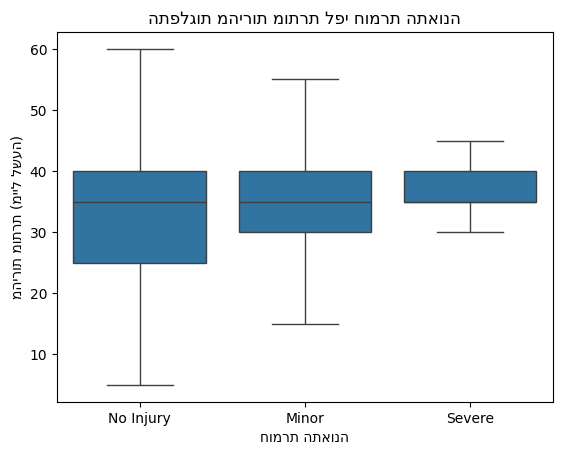

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# עלילת Boxplot למהירות מותרת לפי רמת חומרה (3 קטגוריות למשל)
sns.boxplot(x='SevLevel3', y='SpeedNum', data=df, showfliers=False)
plt.title("התפלגות מהירות מותרת לפי חומרת התאונה")
plt.ylabel("מהירות מותרת (מייל לשעה)")
plt.xlabel("חומרת התאונה")
plt.show()
